In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [3]:
data_path = "E:/MLOPs/MLOPS_GCP/artifacts/raw/"
df_train = pd.read_csv(data_path+"train.csv")
df_test = pd.read_csv(data_path+"test.csv")
df_train.shape, df_test.shape

((29020, 20), (7255, 20))

In [4]:
df_train.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df_train.drop(columns = ['Unnamed: 0', 'Booking_ID'], inplace=True)
df_train.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.0,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.5,2,Not_Canceled


In [6]:
df_train.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df_train.duplicated().sum(),df_train.shape

(7661, (29020, 18))

In [8]:
df_train.drop_duplicates(inplace = True)
df_train.shape

(21359, 18)

In [9]:
df_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
col = 'booking_status'
df_train[col].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [11]:
### Our dataset is imbalanced

cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest',
        'booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 
       'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
len(cat_cols), len(num_cols)

(6, 12)

## DATA ANALYSIS

In [12]:
data_train = df_train.copy()

#### Univariate Analysis

In [13]:
def num_plot_dist (df,num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize = (15,len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.histplot(data = df, x=column, ax = axes[i][0], kde = True, palette="Blues")
        axes[i][0].set_title(f"Histogram for column {column}")

        sns.boxplot(data =df, x= column, ax = axes[i][1], palette="Greens")
        axes[i][1].set_title(f"Boxplot for column {column}")

    plt.tight_layout()
    plt.show()


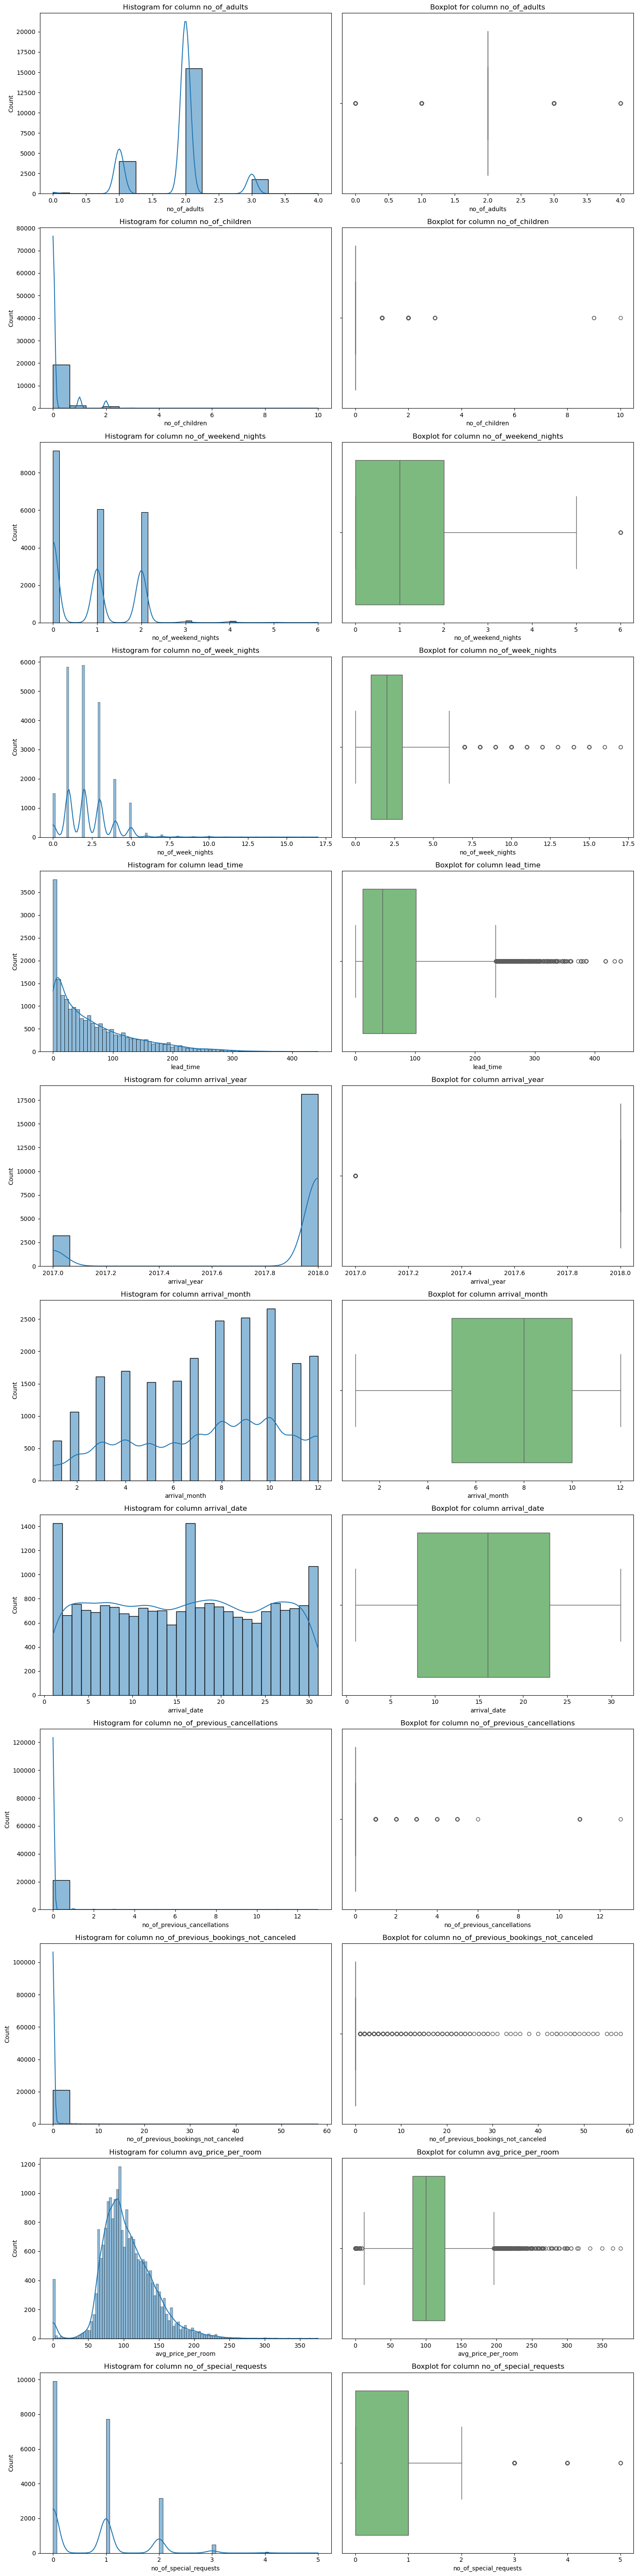

In [14]:
num_plot_dist(data_train,num_cols )

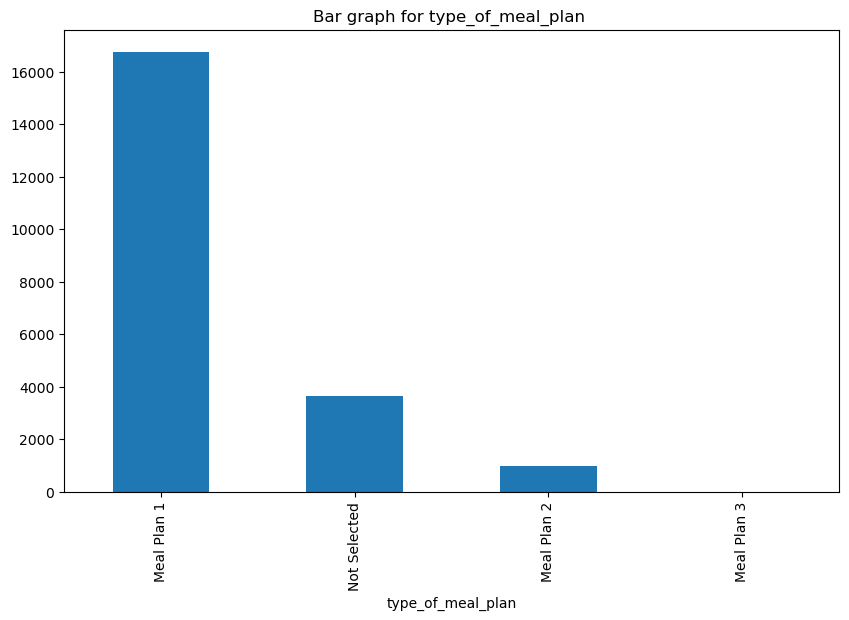

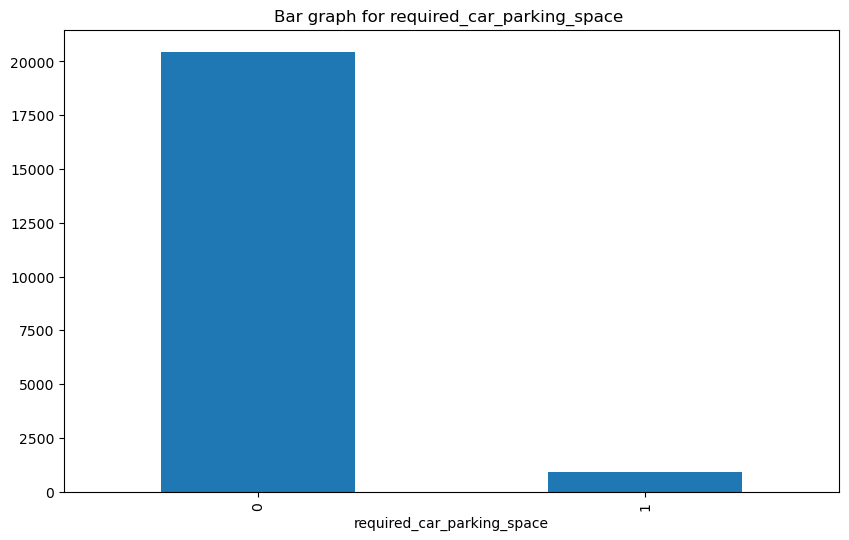

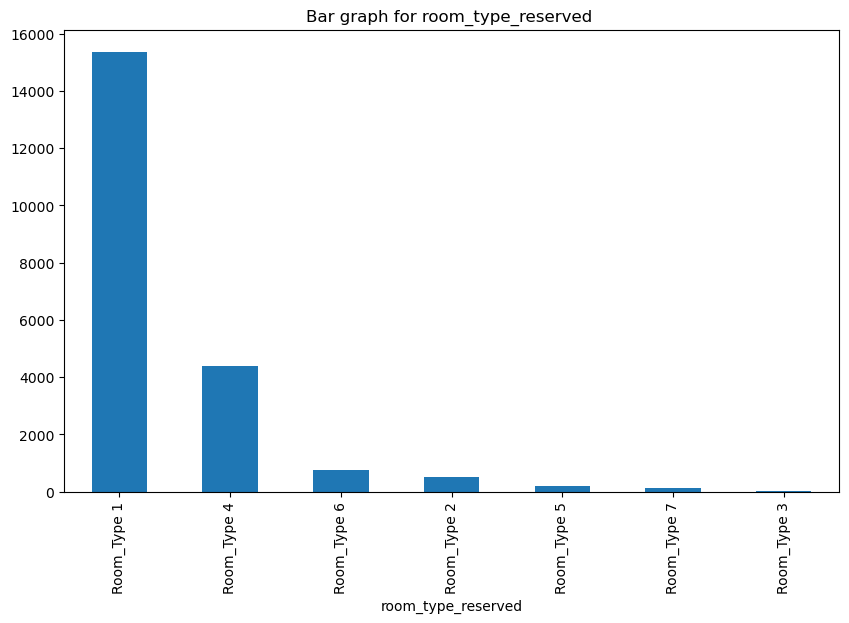

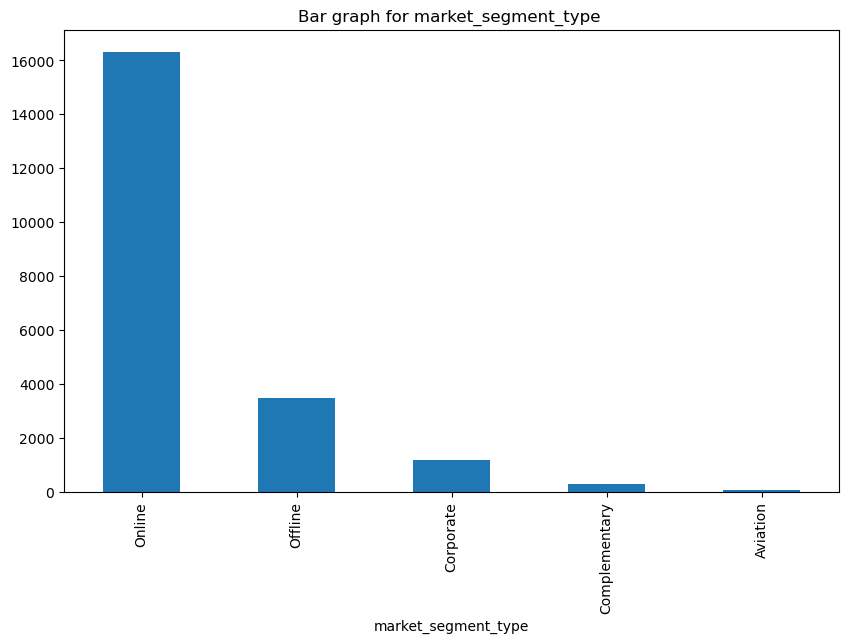

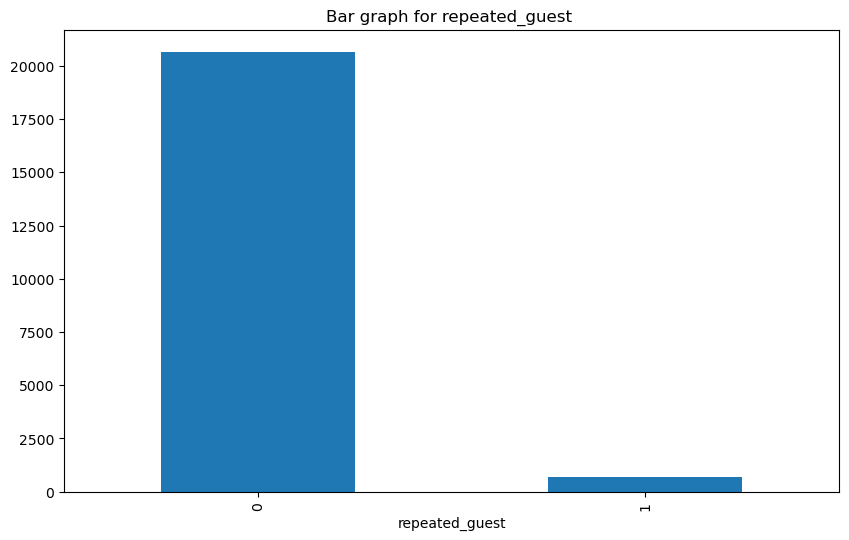

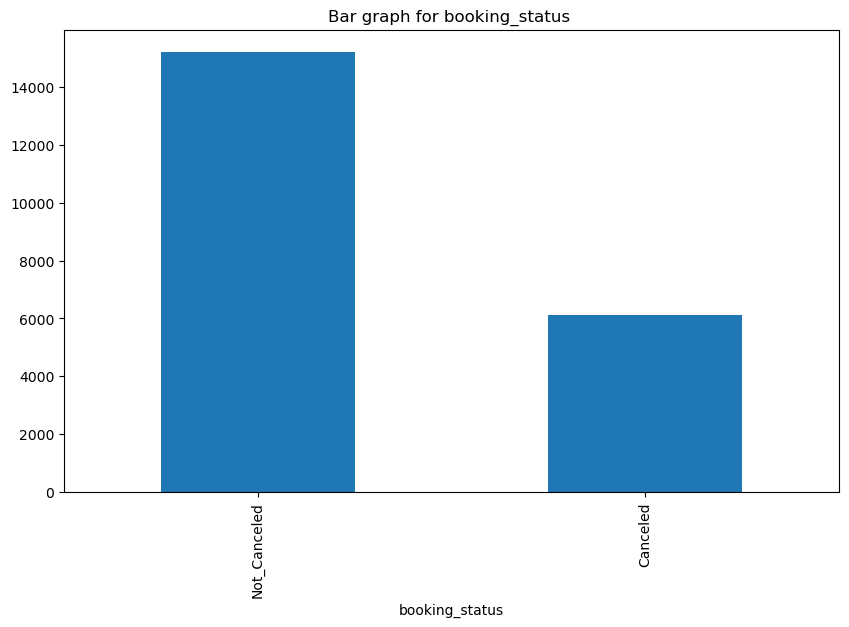

In [15]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data_train[cat_feature].value_counts().plot(kind="bar")
    plt.title(f"Bar graph for {cat_feature} ")
    plt.show()

Bi-variate analysis

In [16]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows,2, figsize =(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x = target, y = column, ax = axes[i],data=df, palette="Blues")
        axes[i].set_title(f" {column} VS {target}")

    plt.tight_layout()
    plt.show()

In [17]:
data_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

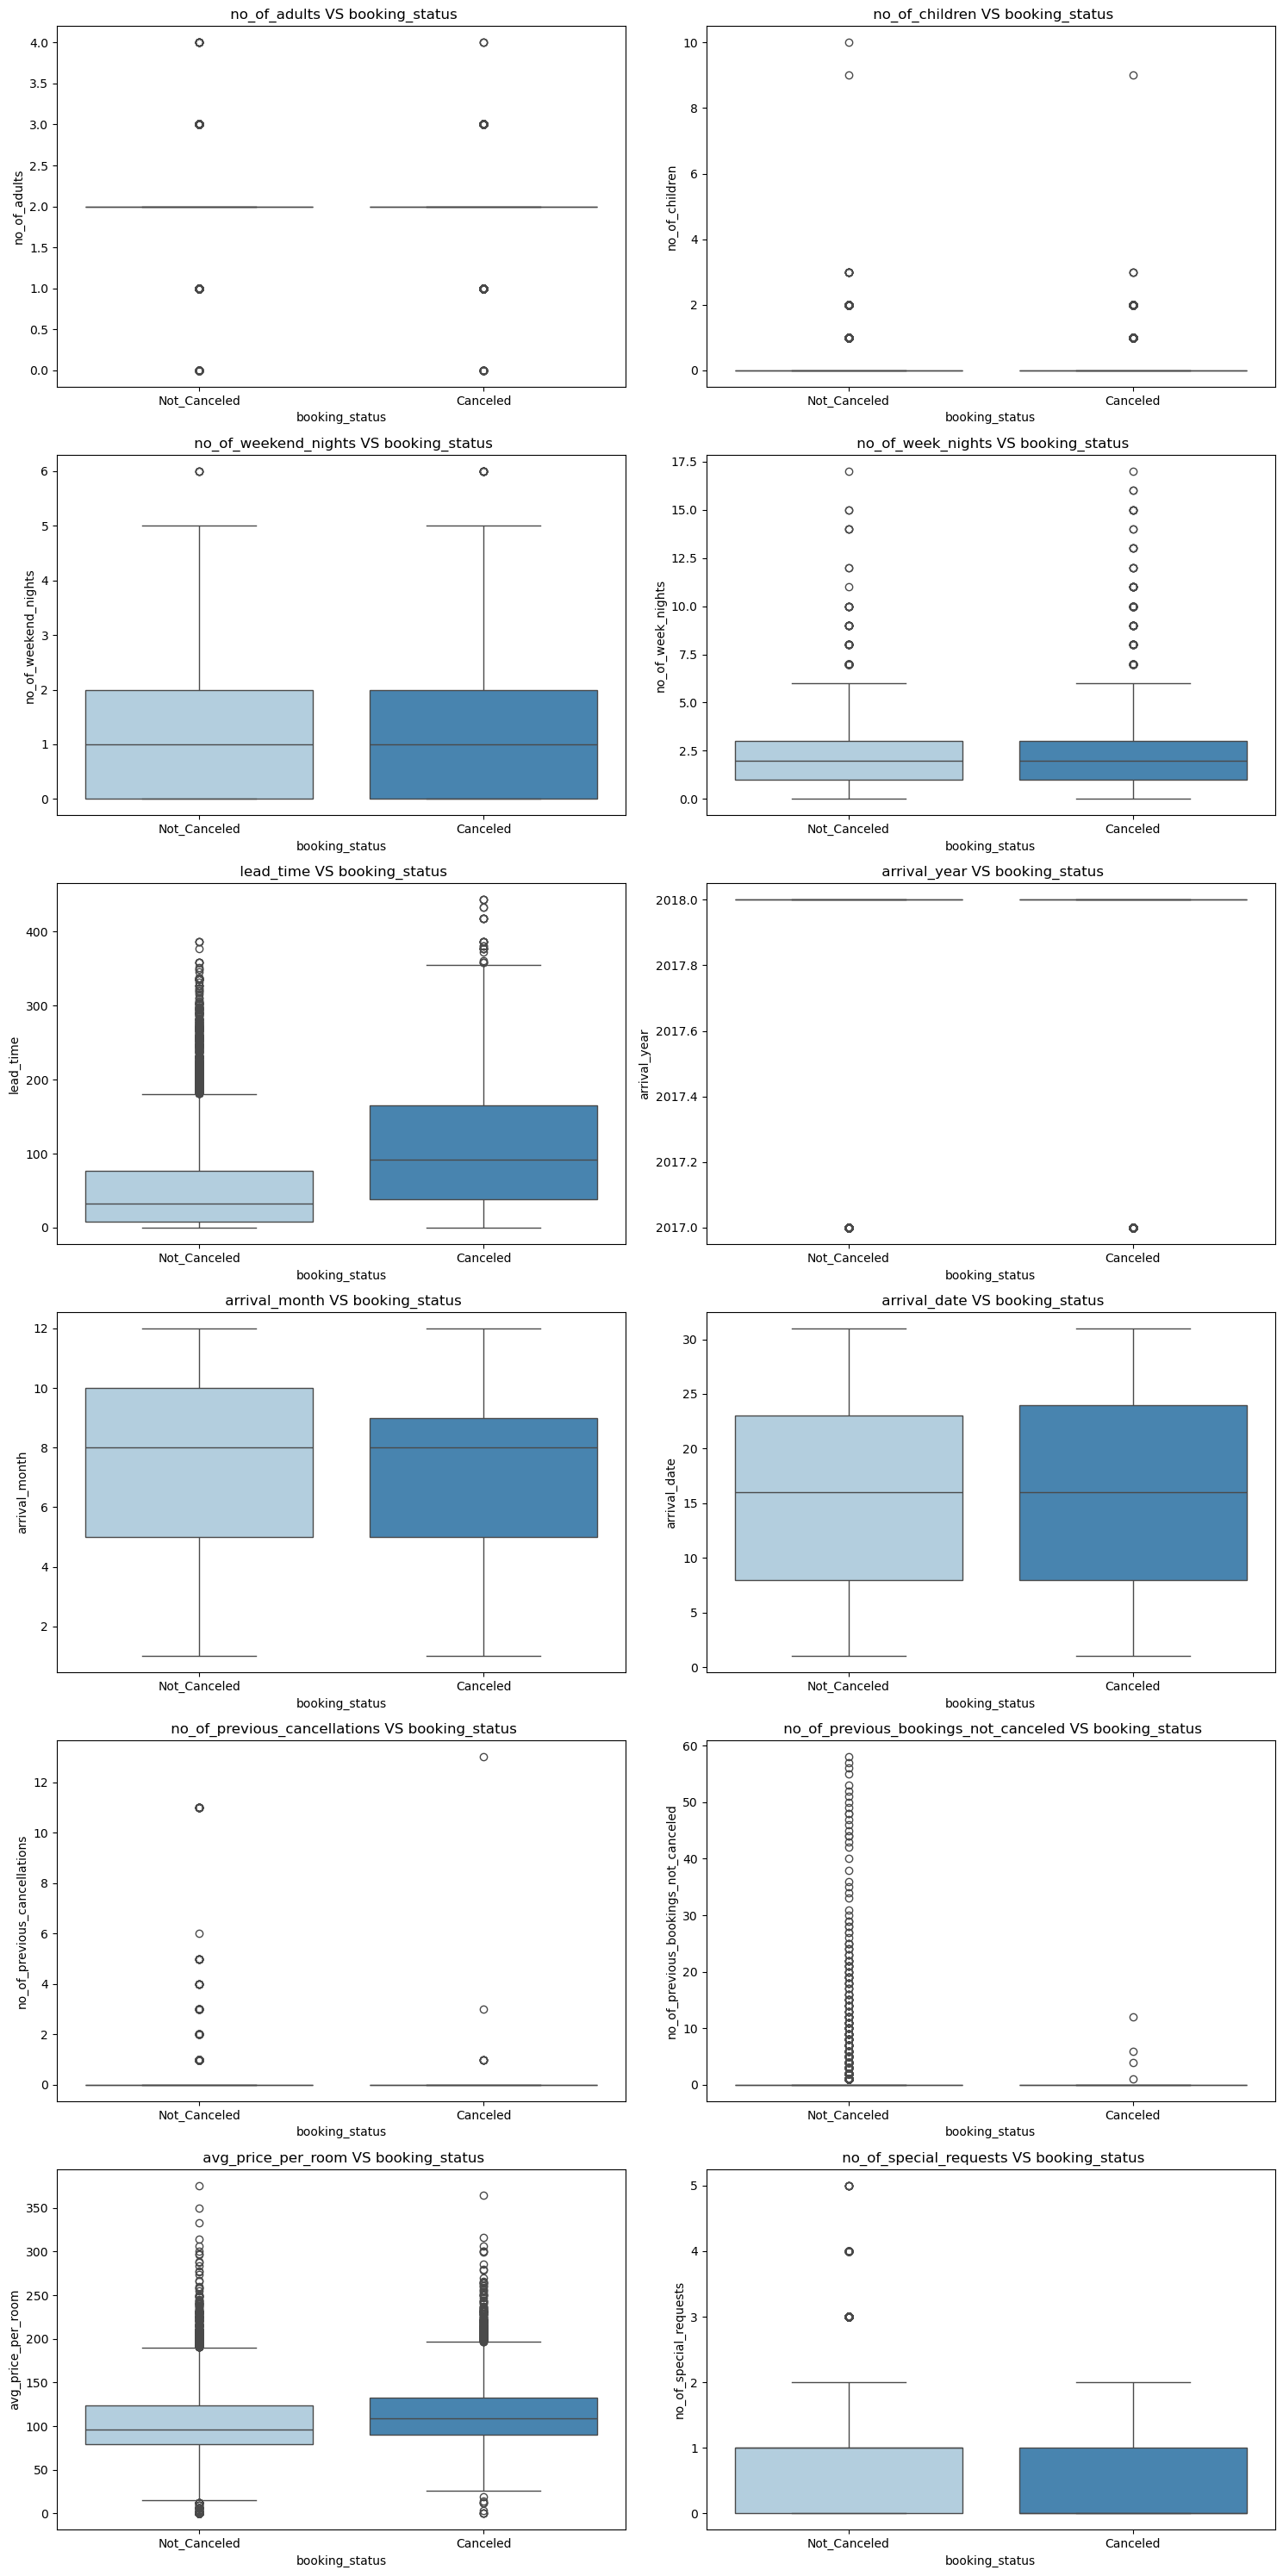

In [18]:
plot_bivariate_num(data_train,'booking_status',num_cols)

In [19]:
def plot_bivariate_cat(df, target, cat_features):

    num_plots = len(cat_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows,2, figsize =(15,num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x = feature, hue = target, ax = axes[i],data=df, palette="Set2")
        axes[i].set_title(f" {feature} VS {target}")
        axes[i].tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()
    plt.show()

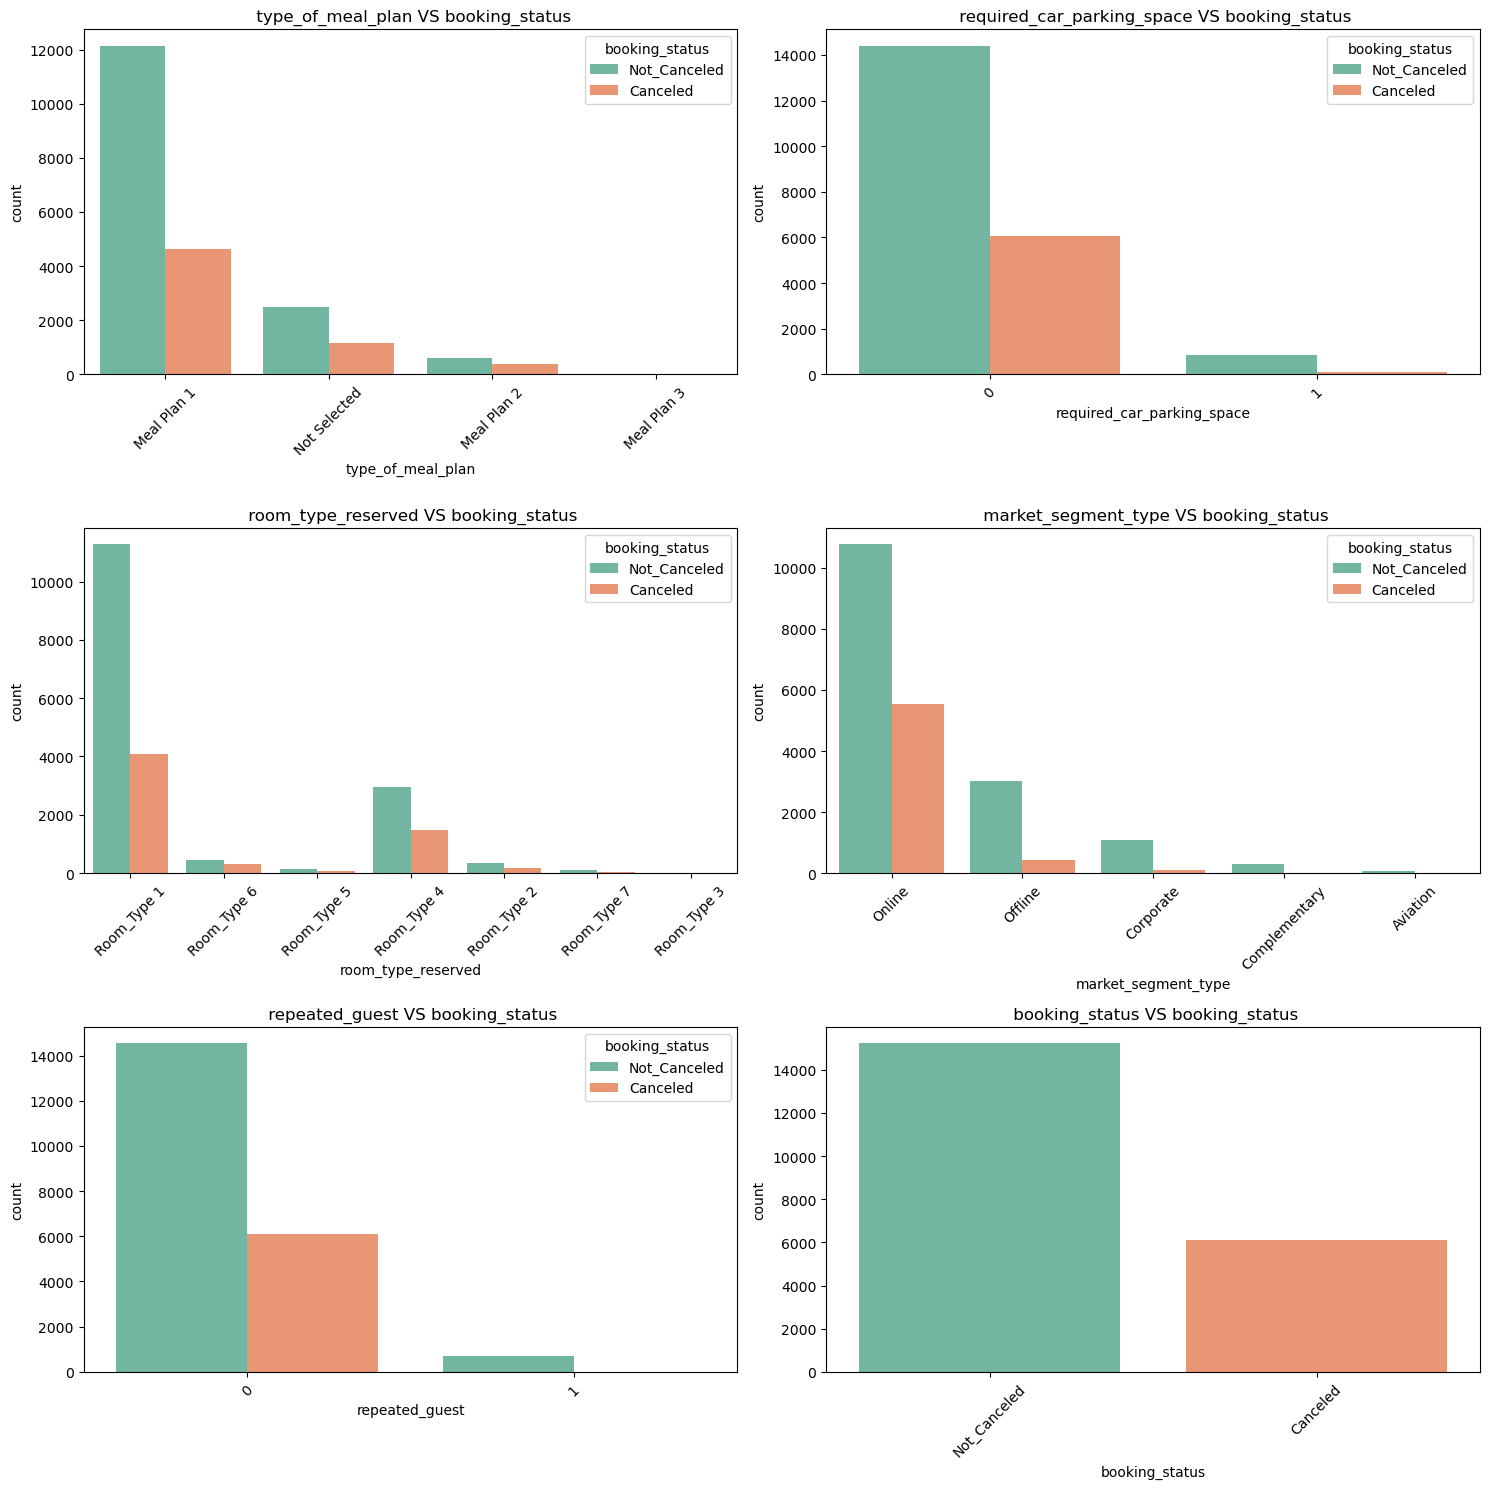

In [20]:
plot_bivariate_cat(data_train, 'booking_status',cat_cols)

#### DATA PROCESSING

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [22]:
# Label encoding categorical data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
mapping = {}
for col in cat_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    mapping[col]= {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


In [23]:
mapping

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [25]:
## checking colinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
x = add_constant(df_train)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [26]:
vif_data["VIF"] = [vif(x.values,i) for i in range(x.shape[1])]
vif_data   # signifies data doesn't have multi colineraity

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [27]:
corr = df_train.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

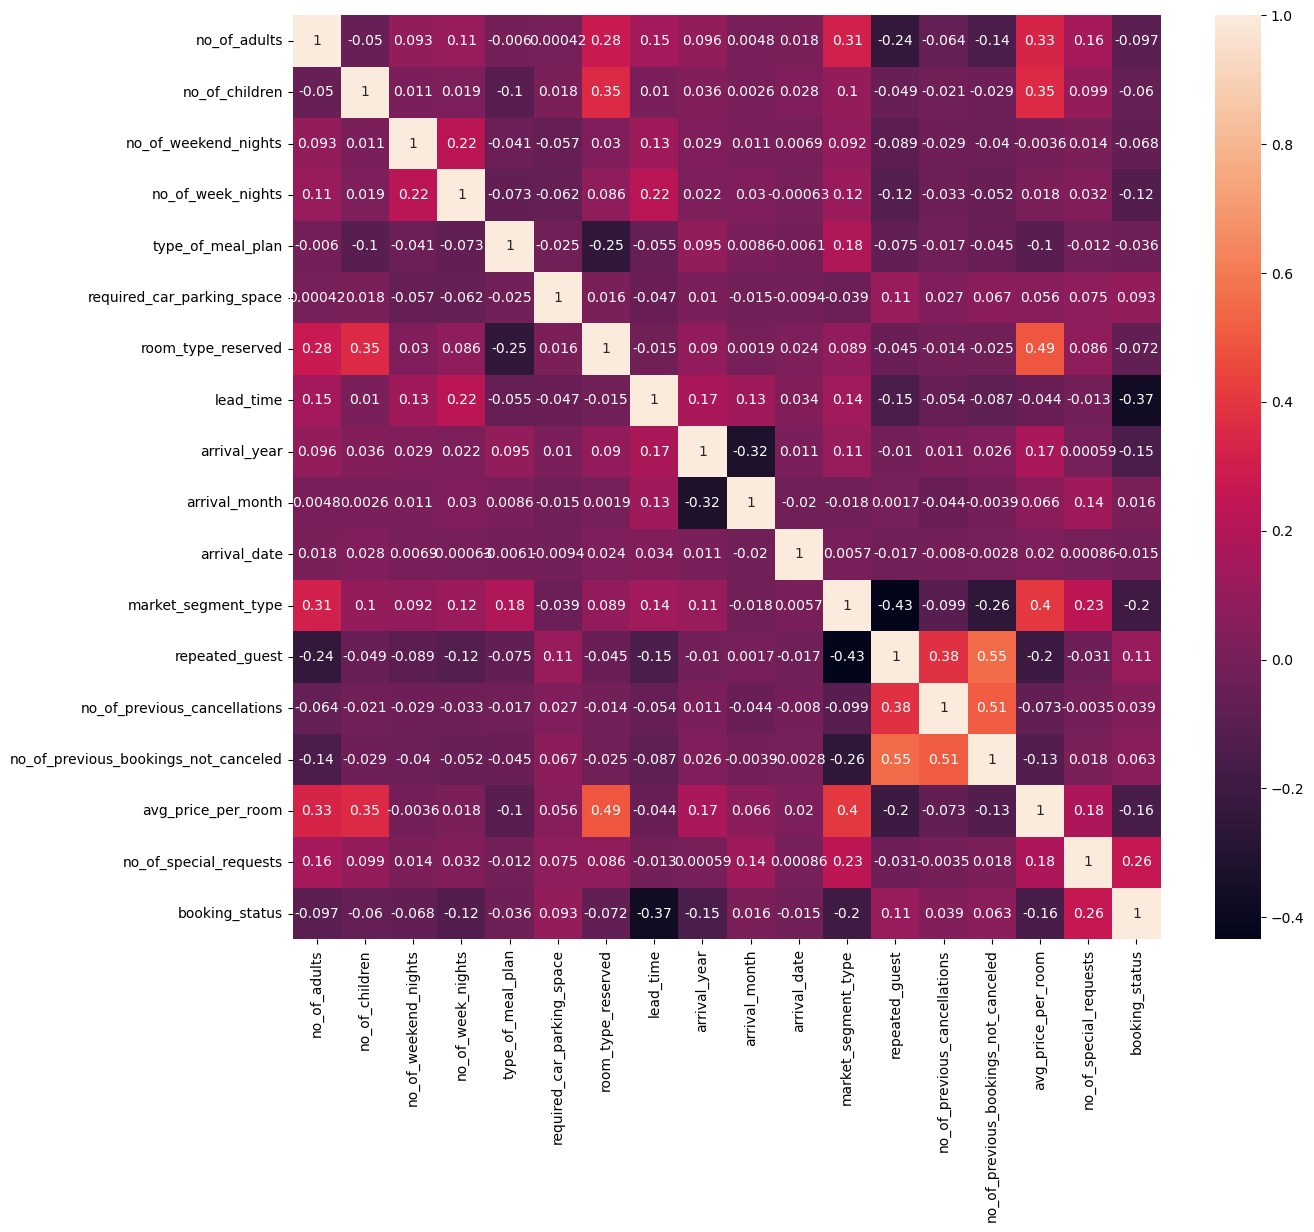

In [28]:
plt.figure(figsize = (14,12))
sns.heatmap(corr, annot =True)

In [29]:
## Skewness
skewness = df_train.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [30]:
# Using log tranformation on skewwd cols
import numpy as np
for col in df_train.columns:
    if skewness[col] >5:
        df_train[col] = np.log1p(df_train[col])
df_train.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [31]:
# Imbalanced dataset

df_train['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [32]:
# Oversampling

x = df_train.drop(columns = "booking_status")
y = df_train["booking_status"]

In [33]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state =42)
x_res, y_res = smote.fit_resample(x,y)
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [35]:
balanced_df = pd.DataFrame(x_res, columns=x.columns)
balanced_df["booking_status"] = y_res
balanced_df.shape

(30462, 18)

In [36]:
df_train = balanced_df.copy()
df_train


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0,0


In [37]:
## Feature columns
len(df_train.columns) , df_train.columns

(18,
 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
        'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
       dtype='object'))

In [38]:
from sklearn.ensemble import RandomForestClassifier
x = df_train.drop(columns = "booking_status")
y = df_train["booking_status"]

In [39]:
model = RandomForestClassifier(random_state=42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [40]:
feature_imp = model.feature_importances_
feature_imp_df = pd.DataFrame( {'feature':x.columns,
                                "feature_importance":feature_imp*100})
feature_imp_df.sort_values(by = 'feature_importance',ascending = False,inplace=True)

In [54]:
top_10_features = feature_imp_df["feature"][:10]
top_10_features

7                  lead_time
16    no_of_special_requests
15        avg_price_per_room
9              arrival_month
10              arrival_date
11       market_segment_type
3          no_of_week_nights
2       no_of_weekend_nights
4          type_of_meal_plan
6         room_type_reserved
Name: feature, dtype: object

In [42]:
x = df_train[top_10_features]
x.shape,y.shape

((30462, 10), (30462,))

### MODEL SELECTION

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
classifiers = {"RandomForestClassifier": RandomForestClassifier(random_state=42),
                "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
                "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
                "LogisticRegression": LogisticRegression(random_state=42),
                "SVC": SVC(random_state=42),
                "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
                "GaussianNB":GaussianNB(),
                "KNeighborsClassifier":KNeighborsClassifier(),
                "XGBClassifier":XGBClassifier(random_state=42),
                "LGBMClassifier":LGBMClassifier(random_state=42)
              }
metrics = { "Model":[],
            "Accuracy":[],
            "Precision":[],
            "Recall":[],
            "F1 score":[]
        }

(24369, 10) (6093, 10) (24369,) (6093,)


In [45]:
for model_name, classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    F1_Score = f1_score(y_test, y_pred)
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 score'].append(F1_Score)
    



KeyboardInterrupt: 

In [ ]:
metrics_df = pd.DataFrame(metrics)
metrics_df 

,Model,Accuracy,Precision,Recall,F1 score
0,RandomForestClassifier,0.893484,0.893659,0.895114,0.894386
1,GradientBoostingClassifier,0.835549,0.819333,0.864169,0.841154
2,AdaBoostClassifier,0.804530,0.801025,0.814332,0.807624
3,LogisticRegression,0.777614,0.802683,0.740717,0.770456
4,SVC,0.720335,0.729657,0.706840,0.718068
5,DecisionTreeClassifier,0.841950,0.851050,0.831922,0.841377
6,GaussianNB,0.772526,0.802660,0.727362,0.763158
7,KNeighborsClassifier,0.779911,0.857675,0.675244,0.755604
8,XGBClassifier,0.871820,0.869074,0.877850,0.873440
9,LGBMClassifier,0.862957,0.849546,0.884691,0.866762


In [ ]:
## Model selected is random forest
## Training RandomForest

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((24369, 10), (6093, 10), (24369,), (6093,))

In [ ]:
rf = RandomForestClassifier(random_state=42)
params_dist = {  "n_estimators": randint(100,500) ,
                 "max_depth": randint(10,50),
                 "min_samples_split": randint(2,10),
                 "min_samples_leaf": randint(1,5),
                 "bootstrap": [True,False]
                 }

random_search = RandomizedSearchCV( estimator= rf,
                                   param_distributions= params_dist,
                                  n_iter=5,
                                  cv = 5,
                                  verbose =True,
                                  random_state =42,
                                  scoring= 'accuracy'
                                  )
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002252CCCEE90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002252CB00290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002252C9B6510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002252B67F590>},
                   random_state=42, scoring='accuracy', verbose=True)

In [ ]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [ ]:
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
accuracy,precision, recall, F1_Score


(0.8910224848186443, 0.8885658914728682, 0.8960912052117264, 0.892312682452157)

In [ ]:
## SAve this model
import joblib
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [ ]:
# loading mode
rf_model_loaded = joblib.load("random_forest.pkl")
rf_model_loaded

RandomForestClassifier(bootstrap=False, max_depth=33, min_samples_leaf=3,
                       min_samples_split=7, n_estimators=408, random_state=42)

In [ ]:
i= 2
rf_model_loaded.predict(x_train.iloc[[i],:]), y_test.iloc[i]

(array([0]), 0)